
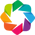

In [1]:
import holoviews as hv
hv.extension('bokeh')

In [2]:
%load_ext autoreload
%autoreload 2

import sys
sys.path.insert(0,'../')

from IPython.core.debugger import set_trace as ist

In [95]:
import typyPRISM
from typyPRISM.calculate.prism.structure_factor import structure_factor
from typyPRISM.calculate.prism.pair_correlation import pair_correlation
import numpy as np

sys = typyPRISM.System(['polymer'],kT=1.0)
sys.domain = typyPRISM.Domain(dr=0.005,length=32768)
sys.closure['polymer','polymer'] = typyPRISM.closure.PercusYevick()
sys.potential['polymer','polymer'] = typyPRISM.potential.HardSphere(sigma=1.0)
sys.omega['polymer','polymer'] = typyPRISM.omega.Gaussian(sigma=1.0,length=16000)


solutions1 = []
solutions2 = []
guess = np.zeros_like(sys.domain.r)
for density in [0.6,0.8,1.0]:
    print('==> Solving for density {}'.format(density))
    sys.density['polymer'] = density
    PRISM = sys.createPRISM()
    result = PRISM.solve(guess)
    
    y = structure_factor(PRISM)[0,0]
    x = sys.domain.k
    solutions2.append([density,x,y])
    
    x = sys.domain.r
    y = pair_correlation(PRISM)[0,0]
    solutions1.append([density,x,y])
    
    guess = np.copy(PRISM.x)
    


==> Solving for density 0.6
0:  |F(x)| = 81.9231; step 0.186349; tol 0.593894
1:  |F(x)| = 81.8849; step 0.000490242; tol 0.89916
2:  |F(x)| = 81.6487; step 0.00302978; tol 0.894817
3:  |F(x)| = 81.5051; step 0.00185416; tol 0.896837
4:  |F(x)| = 67.3323; step 0.15266; tol 0.723885
5:  |F(x)| = 66.924; step 0.0349993; tol 0.889119
6:  |F(x)| = 66.3525; step 0.0383787; tol 0.884693
7:  |F(x)| = 66.3017; step 0.0108826; tol 0.898623
8:  |F(x)| = 65.9845; step 0.027576; tol 0.891409
9:  |F(x)| = 65.9811; step 0.000723179; tol 0.899908
10:  |F(x)| = 65.9803; step 0.000168485; tol 0.899979
11:  |F(x)| = 65.9799; step 9.45296e-05; tol 0.899988
12:  |F(x)| = 65.7162; step 0.029531; tol 0.89282
13:  |F(x)| = 65.7133; step 0.000599012; tol 0.899922
14:  |F(x)| = 65.6897; step 0.00462221; tol 0.899353
15:  |F(x)| = 65.568; step 0.0208613; tol 0.896668
16:  |F(x)| = 65.4853; step 0.0157736; tol 0.89773
17:  |F(x)| = 65.4395; step 0.00880559; tol 0.898741
18:  |F(x)| = 65.3126; step 0.0240576; tol

In [96]:
gr_compare = []
gr_compare.append([0.6,np.loadtxt('/home/tbm/elwood/0.6.csv',delimiter=',')])
gr_compare.append([0.8,np.loadtxt('/home/tbm/elwood/0.8.csv',delimiter=',')])
gr_compare.append([1.0,np.loadtxt('/home/tbm/elwood/1.0.csv',delimiter=',')])

In [101]:
%%opts Curve Scatter [width=500,height=400] Layout [shared_axes=False] Scatter (size=10,alpha=0.5)
%%opts Overlay [legend_position='bottom_left']
%%opts Layout [shared_axes=False]
%%opts Curve Scatter [fontsize={'xlabel':14,'xlabel':14,'ylabel':14,'ticks':12}]


plots = []
plots2 = []
colors = {}
colors[1.0] = 'blue'
colors[0.8] = 'red'
colors[0.6] = 'green'
ls = {}
ls[1.0] = 'solid'
ls[0.8] = 'dashed'
ls[0.6] = 'dotted'
for name,x,y in solutions2:
    yd = y - 1.0
    yd0 = yd[0]# np.poly1d(np.polyfit(x[:3],yd[:3],1))(0.0)
    print(yd0,yd[0])
    label = 'rho={} (typyPRISM)'.format(name)
    style = {'line_dash':ls[name],'color':colors[name]}
    c1 = hv.Curve((x,yd/yd0),label=label,extents=(0,0,3,None))(style=style)
    plots.append(c1)
    
    label = 'rho={} (typyPRISM)'.format(name)
    style = {'line_dash':ls[name],'color':colors[name]}
    c1 = hv.Scatter((name,yd0),label=label,extents=(0,0,3,None))(style=style)
    plots2.append(c1)
    
    
markers = {}
markers[1.0] = 'o'
markers[0.8] = '^'
markers[0.6] = 'd'
for name,gr in gr_compare:
    style = {'marker':markers[name],'color':colors[name]}
    c2 = hv.Scatter((gr[:,0],gr[:,1]),label='rho={} (ref [#])'.format(name),extents=(0.4,None,1.2,None))(style=style)
    plots.append(c2)
O1 = hv.Overlay(plots).redim.label(x='k',y='S(k)')
O2 = hv.Overlay(plots2).redim.label(x='rho',y='S(0)')

hv.Layout([O1,O2]).cols(1)

10.689810983 10.689810983
3.79570631172 3.79570631172
1.15987199991 1.15987199991


:Layout
   .Overlay.I  :Overlay
      .Curve.Rho_equals_0_full_stop_6_left_parenthesis_typyPRISM_right_parenthesis                                             :Curve   [x]   (y)
      .Curve.Rho_equals_0_full_stop_8_left_parenthesis_typyPRISM_right_parenthesis                                             :Curve   [x]   (y)
      .Curve.Rho_equals_1_full_stop_0_left_parenthesis_typyPRISM_right_parenthesis                                             :Curve   [x]   (y)
      .Scatter.Rho_equals_0_full_stop_6_left_parenthesis_ref_left_square_bracket_number_right_square_bracket_right_parenthesis :Scatter   [x]   (y)
      .Scatter.Rho_equals_0_full_stop_8_left_parenthesis_ref_left_square_bracket_number_right_square_bracket_right_parenthesis :Scatter   [x]   (y)
      .Scatter.Rho_equals_1_full_stop_0_left_parenthesis_ref_left_square_bracket_number_right_square_bracket_right_parenthesis :Scatter   [x]   (y)
   .Overlay.II :Overlay
      .Scatter.Rho_equals_0_full_stop_6_left_parenthesis_typyPRISM_right_parenthesis :Scatter   [x]   (y)
      .Scatter.Rho_equals_0_full_stop_8_left_parenthesis_typyPRISM_right_parenthesis :Scatter   [x]   (y)
      .Scatter.Rho_equals_1_full_stop_0_left_parenthesis_typyPRISM_right_parenthesis :Scatter   [x]   (y)

In [55]:
gr_compare2 = []
gr_compare2.append([0.6,np.loadtxt('/home/tbm/elwood/grRho0.6.csv',delimiter=',')])
gr_compare2.append([0.8,np.loadtxt('/home/tbm/elwood/grRho0.8.csv',delimiter=',')])
gr_compare2.append([1.0,np.loadtxt('/home/tbm/elwood/grRho1.0.csv',delimiter=',')])

In [80]:
%%opts Curve Scatter [width=600,height=400] Layout [shared_axes=False] Scatter (size=10,alpha=0.5)
%%opts Overlay [legend_position='bottom_right']
%%opts Layout [shared_axes=False]

plots = []
colors = {}
colors[1.0] = 'blue'
colors[0.8] = 'red'
colors[0.6] = 'green'
ls = {}
ls[1.0] = 'solid'
ls[0.8] = 'dashed'
ls[0.6] = 'dotted'
for name,x,y in solutions1:
    Rg = np.sqrt(16000 *1.0/6.0)
    label = 'rho={} (typyPRISM)'.format(name)
    style = {'line_dash':ls[name],'color':colors[name]}
    c1 = hv.Curve((x/Rg,y),label=label,extents=(0,0,0.6,1.0))(style=style)
    plots.append(c1)
    
markers = {}
markers[1.0] = 'o'
markers[0.8] = '^'
markers[0.6] = 'd'
for name,gr in gr_compare2:
    style = {'marker':markers[name],'color':colors[name]}
    c2 = hv.Scatter((gr[:,0],gr[:,1]),label='rho={} (ref [#])'.format(name),extents=(0.0,None,0.6,None))(style=style)
    plots.append(c2)
O1 = hv.Overlay(plots).redim.label(x='r',y='g(r)')
O1

    

:Overlay
   .Curve.Rho_equals_0_full_stop_6_left_parenthesis_typyPRISM_right_parenthesis                                             :Curve   [x]   (y)
   .Curve.Rho_equals_0_full_stop_8_left_parenthesis_typyPRISM_right_parenthesis                                             :Curve   [x]   (y)
   .Curve.Rho_equals_1_full_stop_0_left_parenthesis_typyPRISM_right_parenthesis                                             :Curve   [x]   (y)
   .Scatter.Rho_equals_0_full_stop_6_left_parenthesis_ref_left_square_bracket_number_right_square_bracket_right_parenthesis :Scatter   [x]   (y)
   .Scatter.Rho_equals_0_full_stop_8_left_parenthesis_ref_left_square_bracket_number_right_square_bracket_right_parenthesis :Scatter   [x]   (y)
   .Scatter.Rho_equals_1_full_stop_0_left_parenthesis_ref_left_square_bracket_number_right_square_bracket_right_parenthesis :Scatter   [x]   (y)